Loading the Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

crimeData = pd.read_csv("/content/drive/MyDrive/Crimes_2012-2016.csv")
print("Total number of crimes in the dataset: {}".format(len(crimeData)))
crimeData.head(3)

Total number of crimes in the dataset: 1136589


,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"


In [ ]:
import seaborn as sns
import folium

In [ ]:
crimeData.shape

(1136589, 14)

In [ ]:
crimeData.columns

Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD',
       'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION',
       'Cross.Street', 'Location.1'],
      dtype='object')

In [ ]:
# Explore the dataset
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136589 entries, 0 to 1136588
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Date.Rptd     1136589 non-null  object
 1   DR.NO         1136589 non-null  int64 
 2   DATE.OCC      1136589 non-null  object
 3   TIME.OCC      1136589 non-null  int64 
 4   AREA          1136589 non-null  int64 
 5   AREA.NAME     1136589 non-null  object
 6   RD            1136589 non-null  int64 
 7   Crm.Cd        1136589 non-null  int64 
 8   CrmCd.Desc    1136431 non-null  object
 9   Status        1136589 non-null  object
 10  Status.Desc   1136589 non-null  object
 11  LOCATION      1136589 non-null  object
 12  Cross.Street  320015 non-null   object
 13  Location.1    1132192 non-null  object
dtypes: int64(5), object(9)
memory usage: 121.4+ MB


# Step 2: Types of Crime Analysis

In [ ]:
# Determine the most common types of crime
crime_types = crimeData['CrmCd.Desc'].value_counts()
print(crime_types)

TRAFFIC DR #                               167051
BATTERY - SIMPLE ASSAULT                    90224
VEHICLE - STOLEN                            73346
BURGLARY FROM VEHICLE                       72511
BURGLARY                                    69410
                                            ...  
TILL TAP - GRAND THEFT ($950.01 & OVER)         3
MANSLAUGHTER, NEGLIGENT                         2
BLOCKING DOOR INDUCTION CENTER                  2
THEFT, COIN MACHINE - GRAND                     1
HOMICIDE (NON-UCR)                              1
Name: CrmCd.Desc, Length: 161, dtype: int64


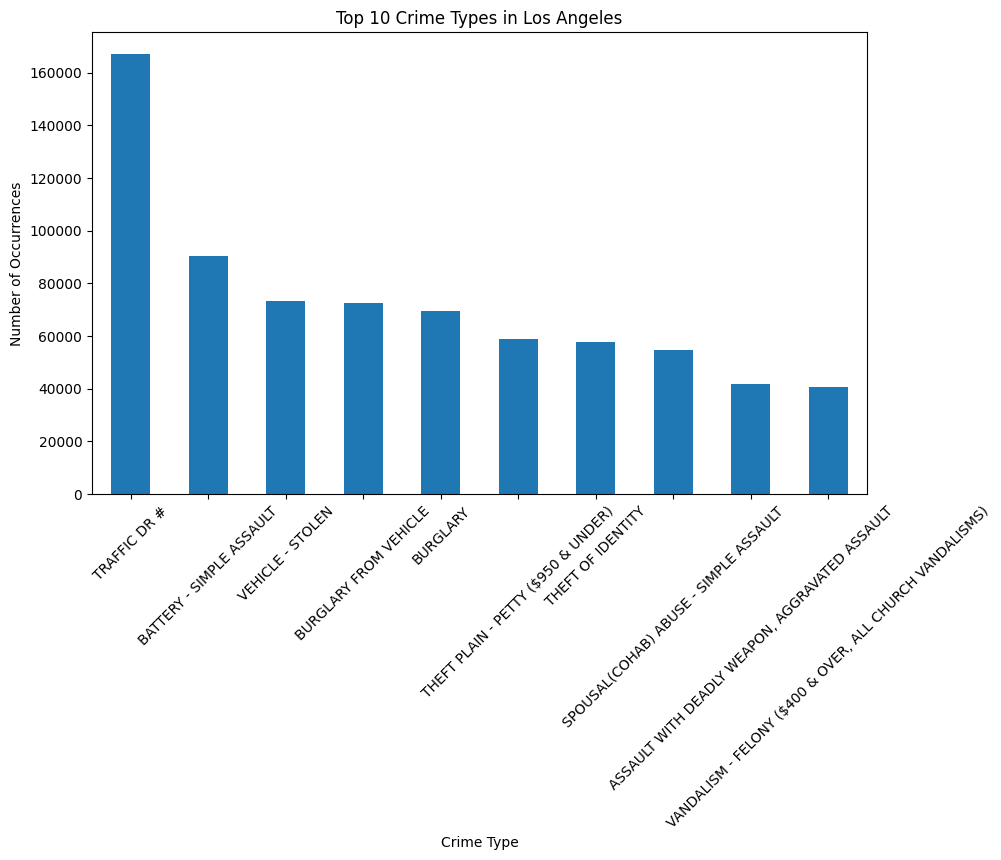

In [ ]:
# Visualize the distribution of different crime types
plt.figure(figsize=(10, 6))
crime_types.head(10).plot(kind='bar')
plt.title('Top 10 Crime Types in Los Angeles')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

# Step 3: Crime Locations Analysis

In [ ]:
# Determine the most common types of crime
crime_location = crimeData['LOCATION'].value_counts()
print(crime_location)

              WESTERN                      AV    1709
              6TH                          ST    1568
              VERMONT                      AV    1488
         WESTERN                      AV         1448
              SUNSET                       BL    1414
                                                 ... 
2014    BERKELEY                     AV             1
              BIRCH                                 1
500 W  31ST                         ST              1
2636    LA SALLE                     AV             1
4435    ORCHARD                      AV             1
Name: LOCATION, Length: 206290, dtype: int64


In [ ]:
crime_location.head(2)

              WESTERN                      AV    1709
              6TH                          ST    1568
Name: LOCATION, dtype: int64

In [ ]:
crimeData.columns

Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD',
       'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION',
       'Cross.Street', 'Location.1'],
      dtype='object')


crimeData['DATE.OCC'][1:4]


output


1    03/10/2013


2    12/18/2013


3    10/18/2013


Name: DATE.OCC, dtype: object

pd.to_datetime(crimeData['DATE.OCC'][1:4])


output


1   2013-03-10


2   2013-12-18


3   2013-10-18


Name: DATE.OCC, dtype: datetime64[ns]

pd.to_datetime(crimeData['DATE.OCC'][1:4]).dt.year



output


1    2013


2    2013


3    2013


Name: DATE.OCC, dtype: int64

In [ ]:
# Extracting year from 'Date Occurred' column and adding it as a new column
crimeData['Year'] = pd.to_datetime(crimeData['DATE.OCC']).dt.year

In [ ]:
# Grouping by year and calculating the total number of crimes
"""
 .size() returns a Series containing the count of occurrences for each group.

  the groupby() function is used to split the data into groups based on some criteria.
"""
total_crimes_by_year = crimeData.groupby('Year').size()

In [ ]:
total_crimes_by_year

Year
2012    238117
2013    234151
2014    234973
2015    228017
2016    201331
dtype: int64

In [ ]:
total_crimes_by_year.dtype

dtype('int64')

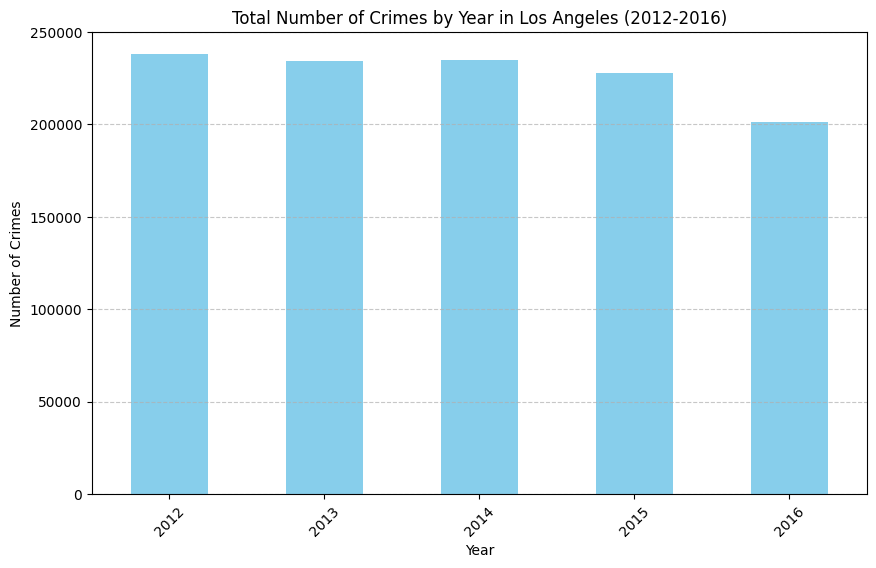

In [ ]:
# Plotting the total number of crimes by year
plt.figure(figsize=(10, 6))
total_crimes_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Crimes by Year in Los Angeles (2012-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crime Locations Analysis


In [ ]:
"""
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}

df = pd.DataFrame(data)

# Iterate over the rows of the DataFrame using iterrows()
for index, row in df.iterrows():
    print(f"Index: {index}, Name: {row['Name']}, Age: {row['Age']}")
"""

"""
Output:

Index: 0, Name: Alice, Age: 25
Index: 1, Name: Bob, Age: 30
Index: 2, Name: Charlie, Age: 35
"""

In [ ]:
crimeData.columns

Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD',
       'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION',
       'Cross.Street', 'Location.1', 'Year'],
      dtype='object')

Finding the area in Los Angeles with highest Crime rate.

In [ ]:
crimeData.groupby('AREA.NAME').size()

AREA.NAME
77th Street    77928
Central        49561
Devonshire     52012
Foothill       41409
Harbor         48960
Hollenbeck     41717
Hollywood      52524
Mission        56274
N Hollywood    61851
Newton         52626
Northeast      54711
Olympic        52796
Pacific        60798
Rampart        47595
Southeast      57369
Southwest      72937
Topanga        51534
Van Nuys       54895
West LA        51276
West Valley    49070
Wilshire       48746
dtype: int64

In [65]:
crimeData['AREA.NAME'].value_counts()

77th Street    77928
Southwest      72937
N Hollywood    61851
Pacific        60798
Southeast      57369
Mission        56274
Van Nuys       54895
Northeast      54711
Olympic        52796
Newton         52626
Hollywood      52524
Devonshire     52012
Topanga        51534
West LA        51276
Central        49561
West Valley    49070
Harbor         48960
Wilshire       48746
Rampart        47595
Hollenbeck     41717
Foothill       41409
Name: AREA.NAME, dtype: int64

In [66]:
# Group the area name and count total incidents in each area
crime_areas = crimeData.groupby('AREA.NAME').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [67]:
crime_areas

,AREA.NAME,counts
0,77th Street,77928
15,Southwest,72937
8,N Hollywood,61851
12,Pacific,60798
14,Southeast,57369
7,Mission,56274
17,Van Nuys,54895
10,Northeast,54711
11,Olympic,52796
9,Newton,52626


In [68]:
crimeData.head(2)

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,Year
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",2013
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)",2013


#What are the most common crime types in Los Angeles?

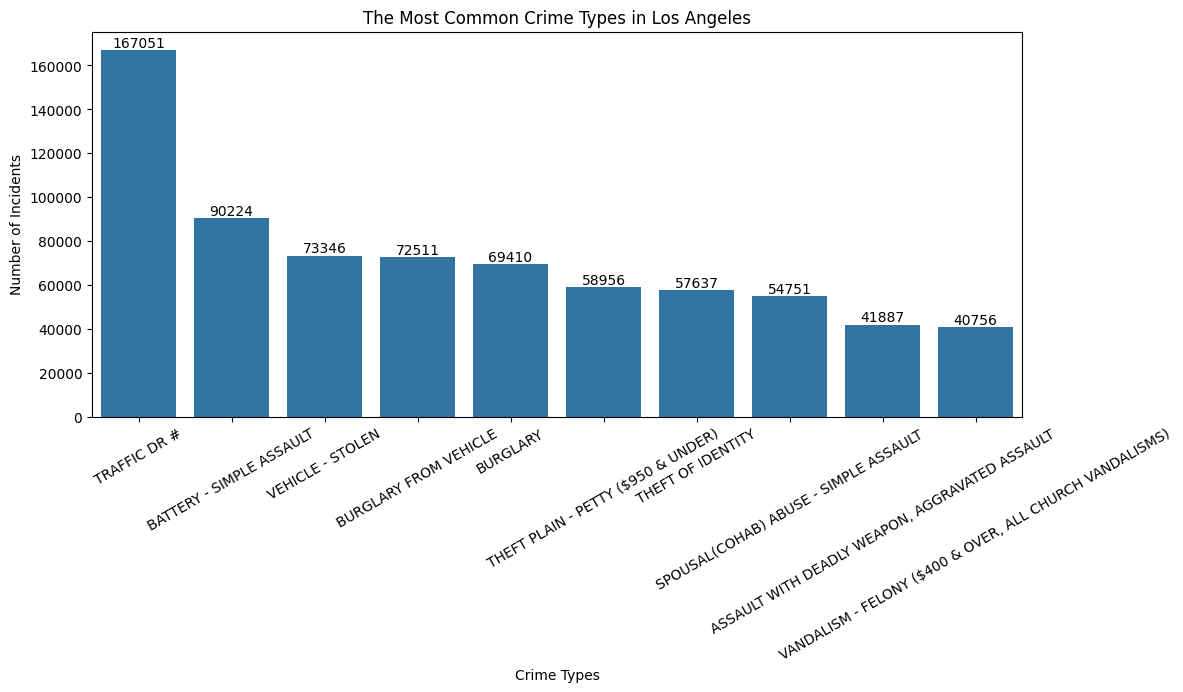

In [77]:
# Group the crime code desc
crime_types = crimeData.groupby('CrmCd.Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Plot the top 10 commited crime
plt.figure(figsize=(12,5))
ax = sns.barplot(data=crime_types[:10], x='CrmCd.Desc', y='counts')
for i in ax.containers:
    ax.bar_label(i)
plt.title('The Most Common Crime Types in Los Angeles')
plt.xlabel('Crime Types')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=30)
plt.show()

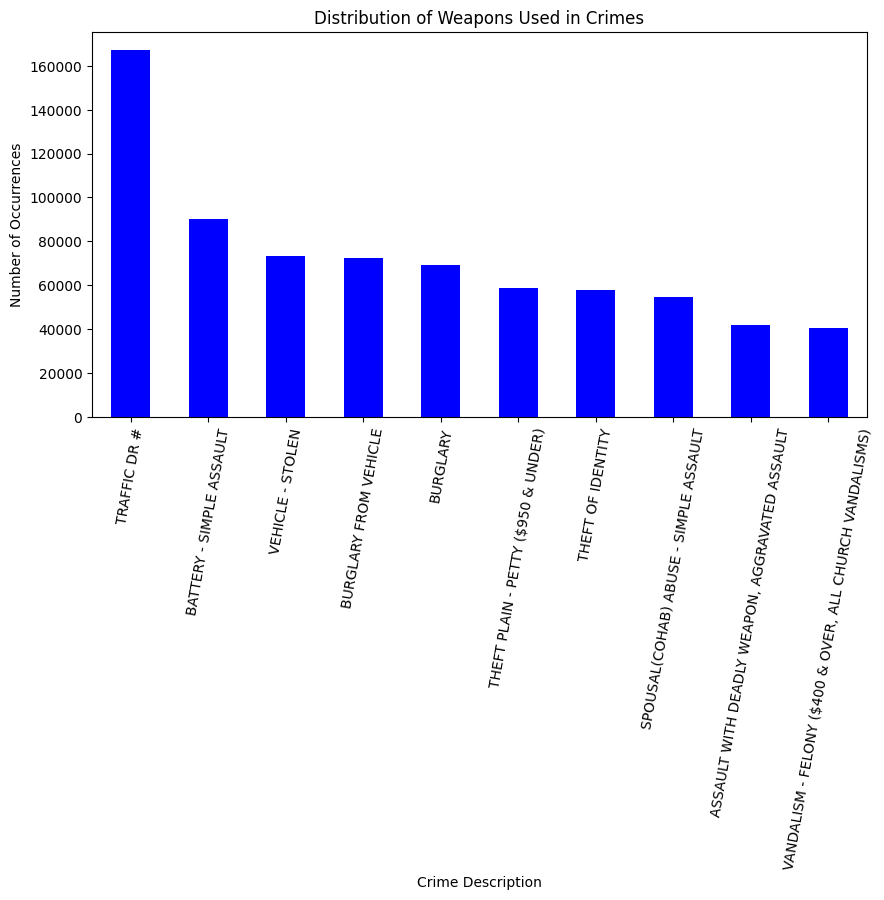

In [82]:
# Count the occurrences of each weapon type
weapon_counts = crimeData['CrmCd.Desc'].value_counts()[:10]

# Visualize the distribution of weapon types
plt.figure(figsize=(10, 5))
weapon_counts.plot(kind='bar', color='blue')
plt.xlabel('Crime Description')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Weapons Used in Crimes')
plt.xticks(rotation=80)
plt.show()